In [ ]:
# Instalacion de librerias no activadas por defecto
! pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
'''
Importacion de las librerias necesarias para el aprendizaje maquina, graficas, simulacion de ataque y respuesta a un ataque de tipo DDoS (Denegacion de Servicio Distribuido)
'''
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

'''
------------------------------------------------------------------------------------------------------------
Lectura de datos y preprocesamiento de la informacion
------------------------------------------------------------------------------------------------------------
'''
try:
    # Intentamos leer el archivo
    df = pd.read_csv("DDos.csv")

    # Verificamos si el DataFrame está vacío
    if df.empty:
        print("El archivo fue leído, pero no contiene datos.")
    else:
        print("Lectura de datos exitosa!")
except FileNotFoundError:
    print("El archivo no fue encontrado. Verifica la ruta.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío o no contiene datos válidos.")
except Exception as e:
    print(f"Ocurrió un error al leer los datos: {e}")

Lectura de datos exitosa!


PREPROCESAMIENTO DE DATOS

In [ ]:
# Lectura de las primeras 3 filas pertenecientes al set de datos
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [6]:
#Unique values in the Label target column
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

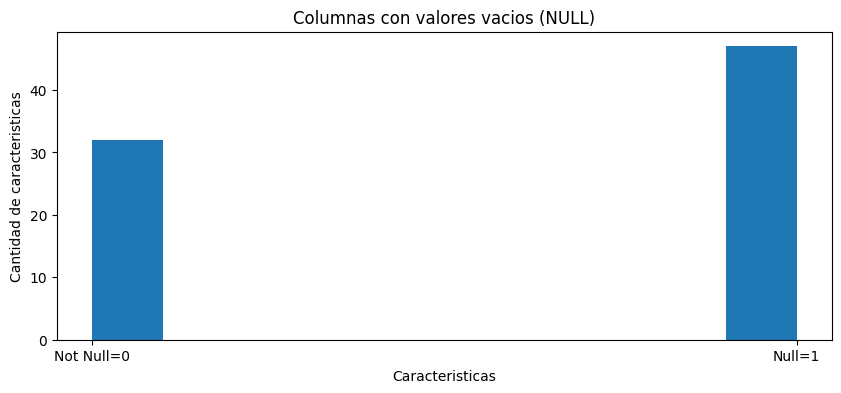

In [7]:
# Inspeccionando los posibles valores nulos en el dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columnas con valores vacios (NULL)')
plt.xlabel('Caracteristicas')
plt.ylabel('Cantidad de caracteristicas')

# Mostrar el grafico comparativo de valores vacios y no vacios
plt.show()

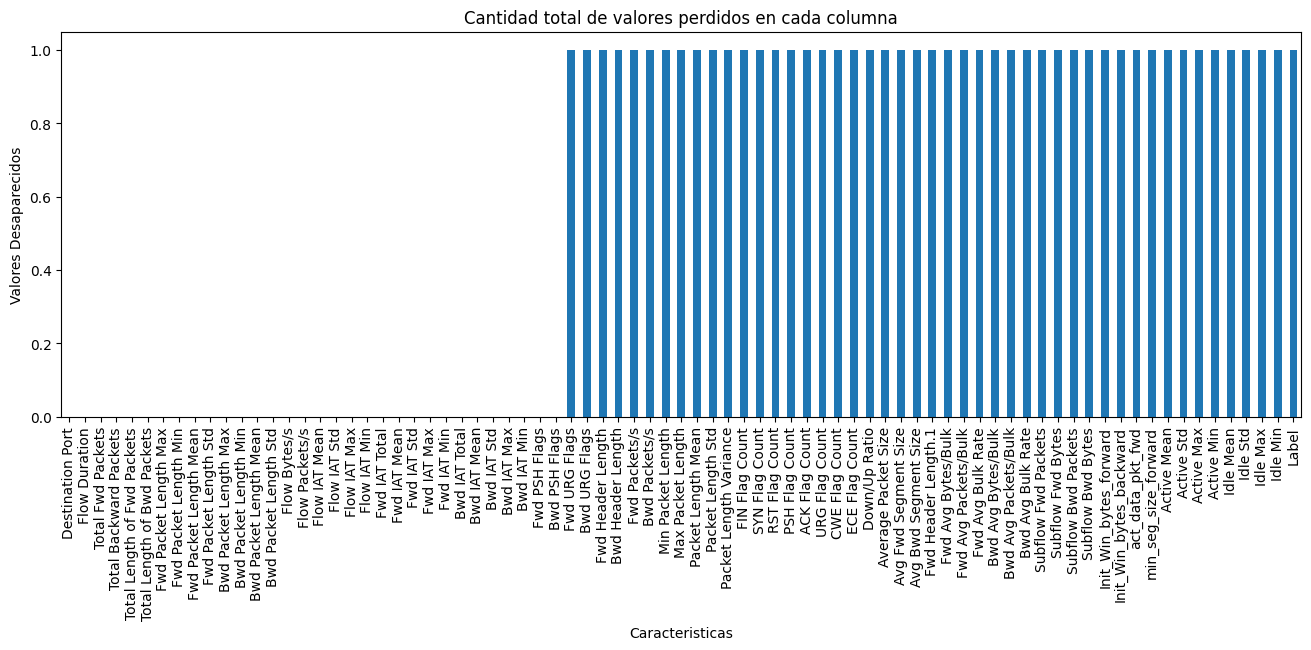

In [8]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Conteo de los valores "NULL" para cada columna
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Caracteristicas")
    plt.ylabel("Valores Desaparecidos")
    plt.title("Cantidad total de valores perdidos en cada columna")
    plt.show()

plotMissingValues(df)

In [ ]:
# Eliminacion de datos irrelevantes (NULL)
data_f=df.dropna()

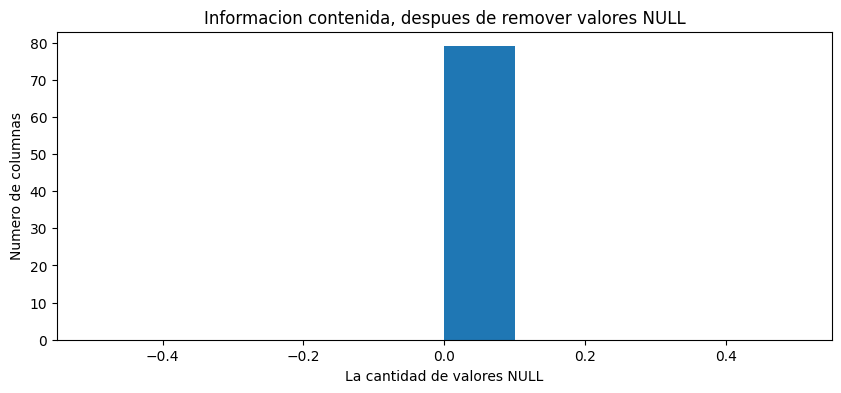

In [10]:
# Inspeccion de los valores "NULL" en el dataset
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Titulos y ejes de comparativa entre valores nulos removidos
plt.title('Informacion contenida, despues de remover valores NULL')
plt.xlabel('La cantidad de valores NULL')
plt.ylabel('Numero de columnas')

# Show the plot
plt.show()

In [11]:
pd.set_option('use_inf_as_na', True)  # Manipular a la informacion como NaN (Not a Number)
null_values=data_f.isnull().sum()  # Check for NaN values

C:\Users\Arif Diaz\AppData\Local\Temp\ipykernel_37160\1619192856.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Manipular a la informacion como NaN (Not a Number)


In [12]:
# Desplegar informacion sobre los tipos de dato de las columnas
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [13]:
# Convertir las etiquetas en el set de datos a valores numericos
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

C:\Users\Arif Diaz\AppData\Local\Temp\ipykernel_37160\2573232426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


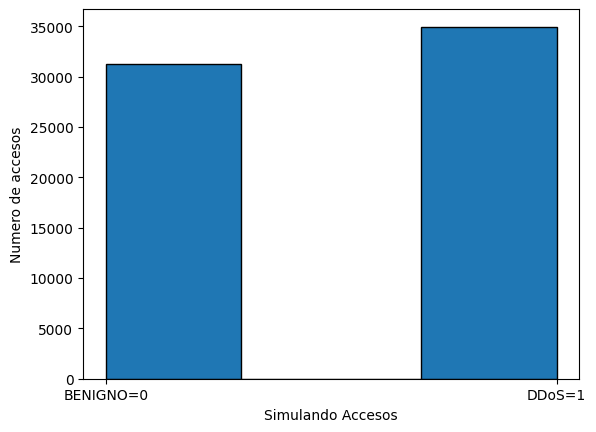

In [16]:
# Impresion de datos modificados simulando accesos positivos y negativos de ataque DDoS

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGNO=0', 'DDoS=1'])
plt.xlabel("Simulando Accesos")
plt.ylabel("Numero de accesos")
plt.show()

PROCESAMIENTO DE LOS DATOS

In [17]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


GRAFICAMOS LOS HISTOGRAMAS DE LA DISTRIBUCION DE LAS CARACTERISTICAS DE LOS ATAQUES

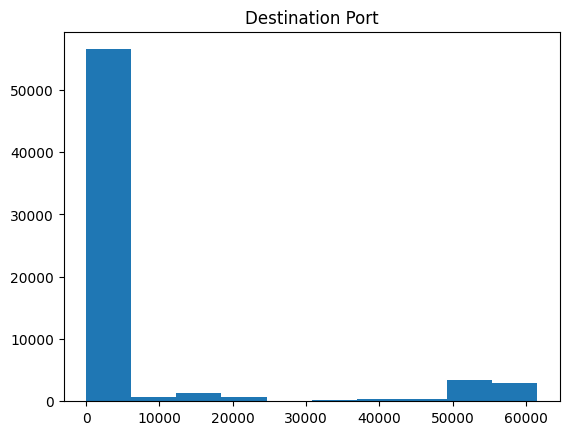

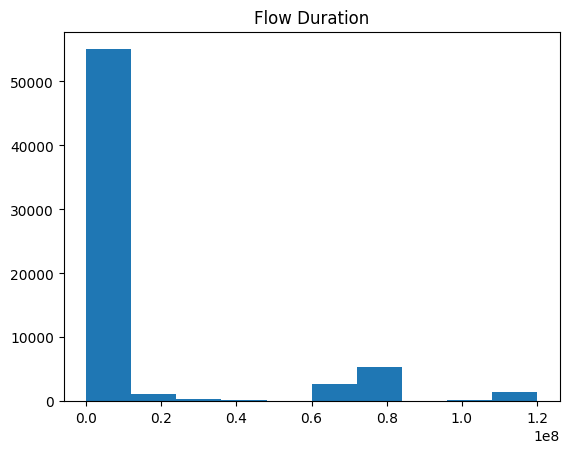

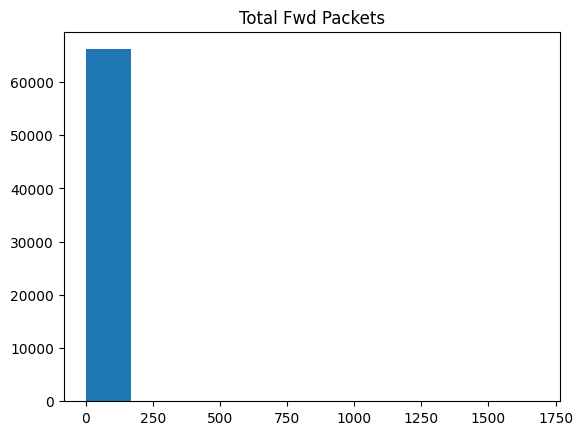

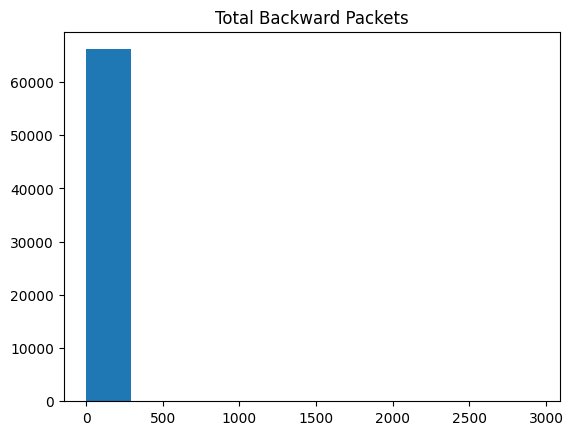

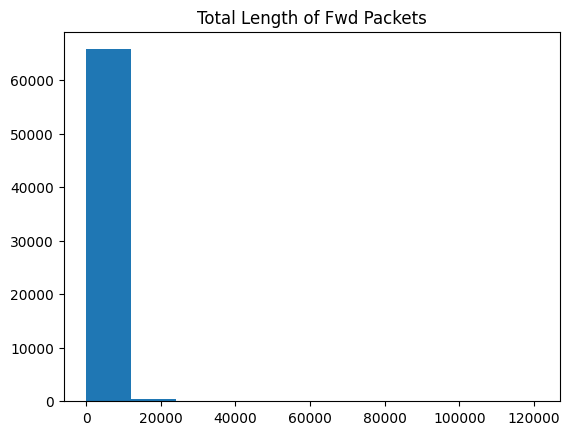

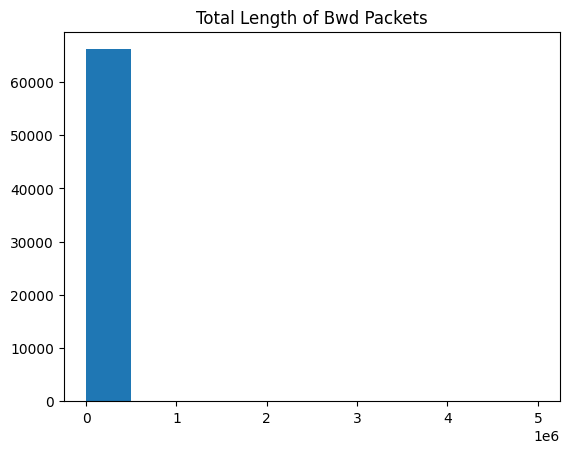

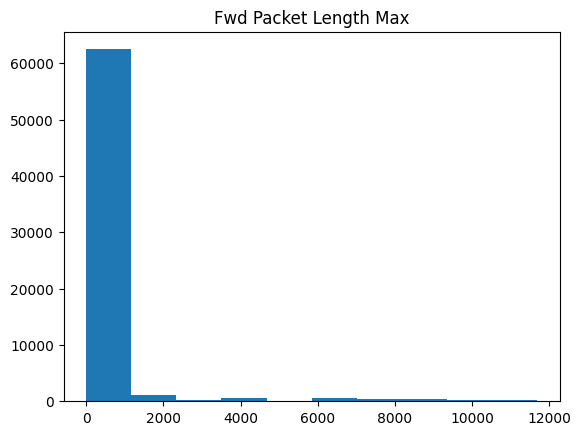

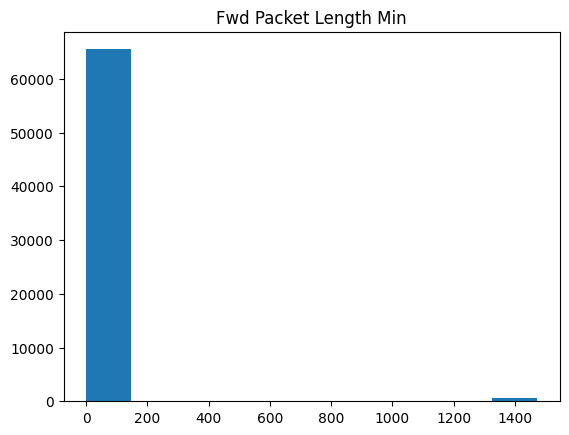

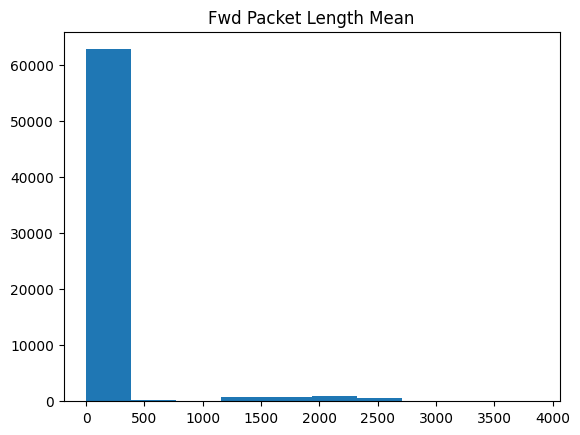

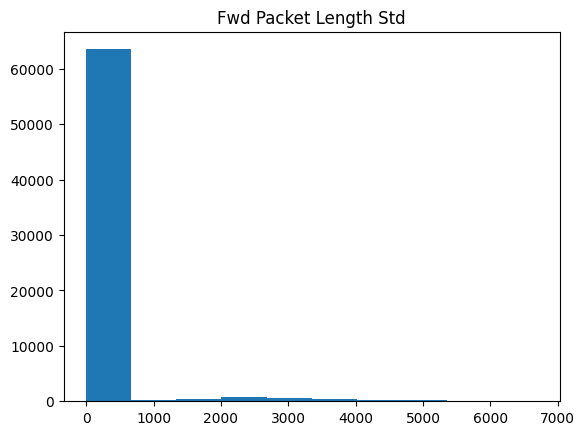

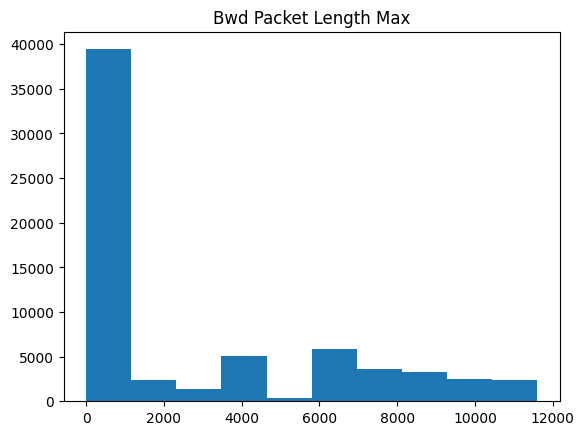

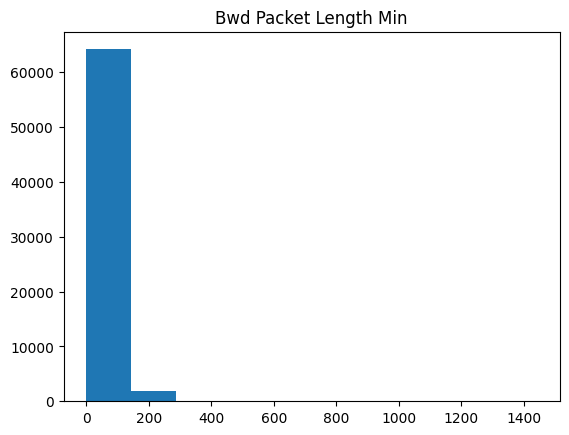

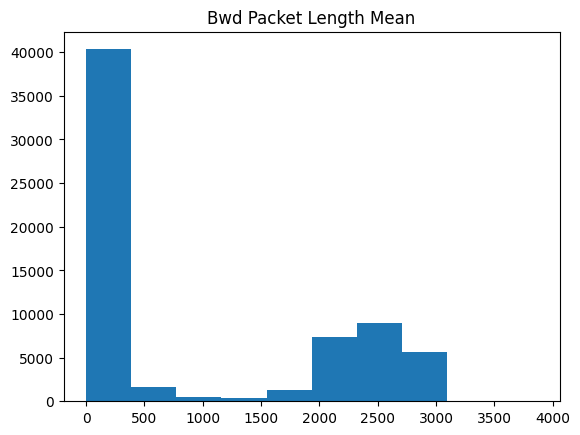

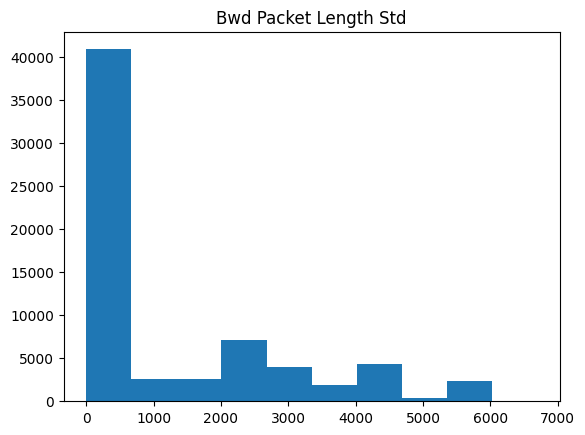

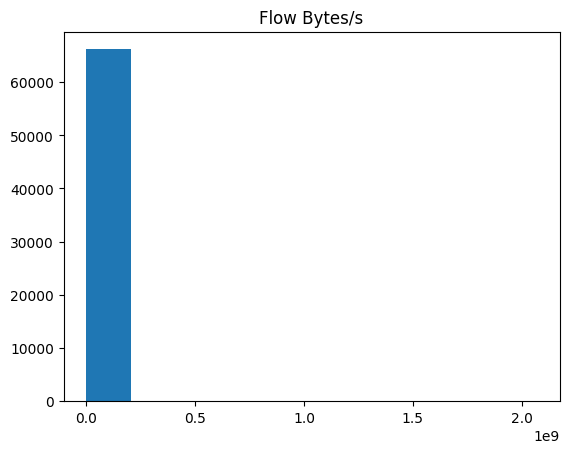

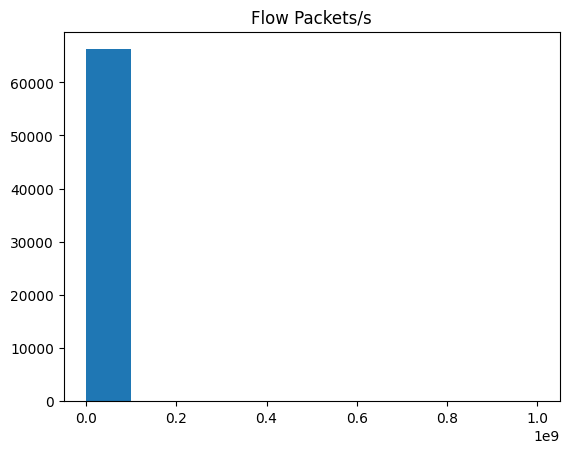

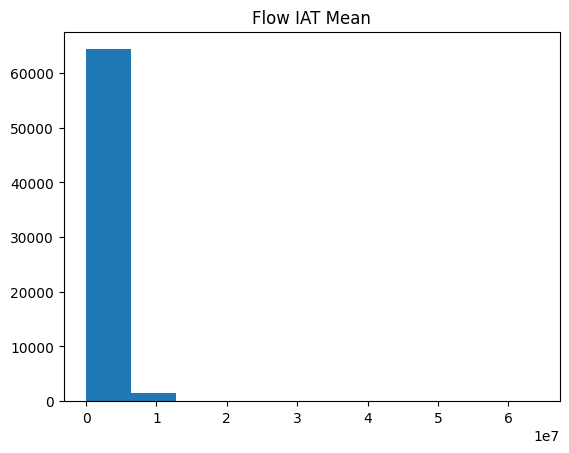

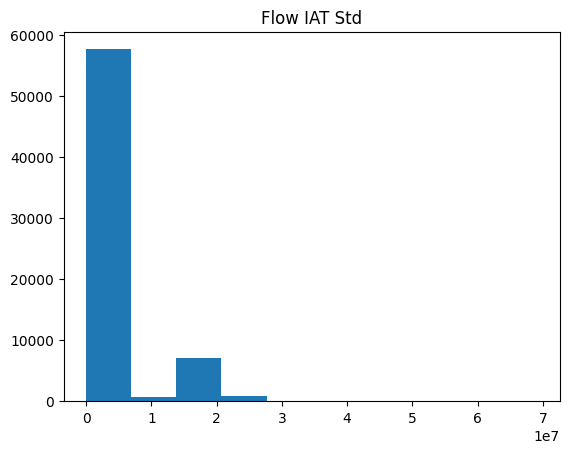

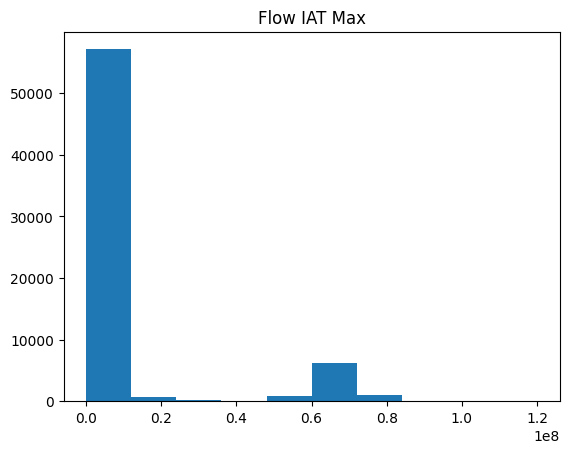

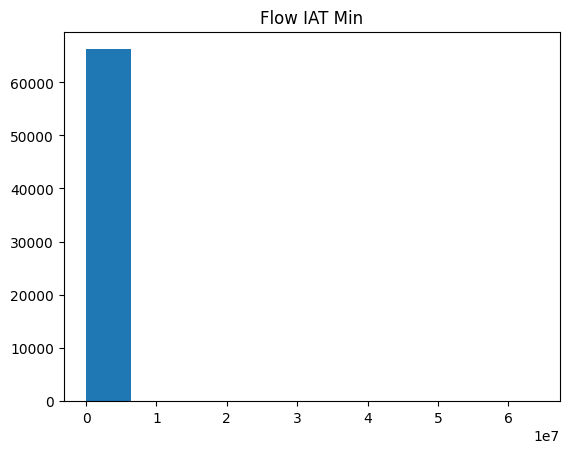

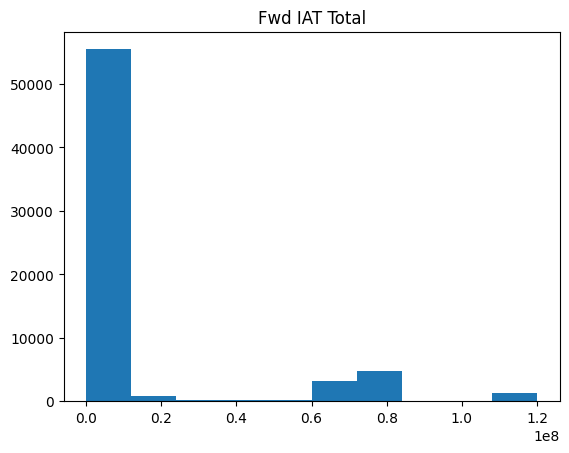

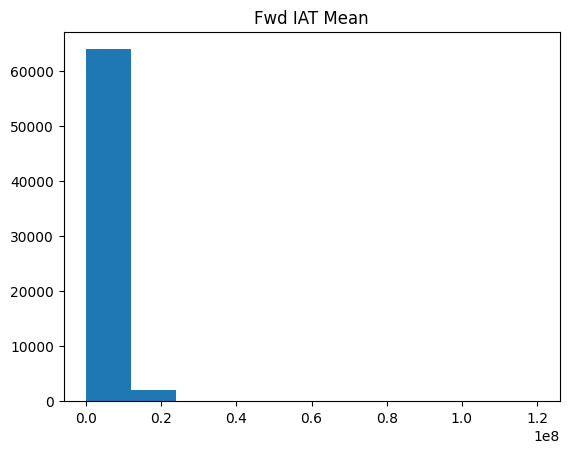

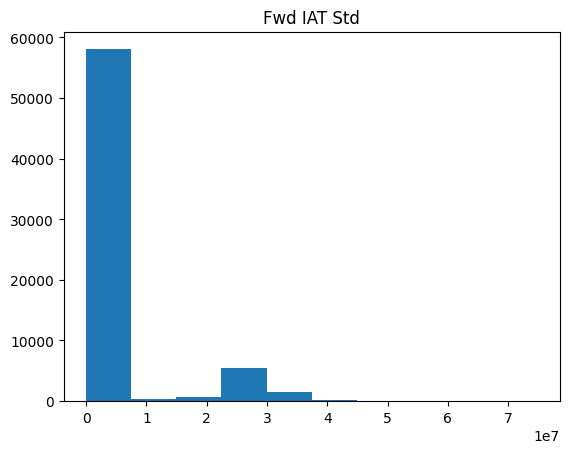

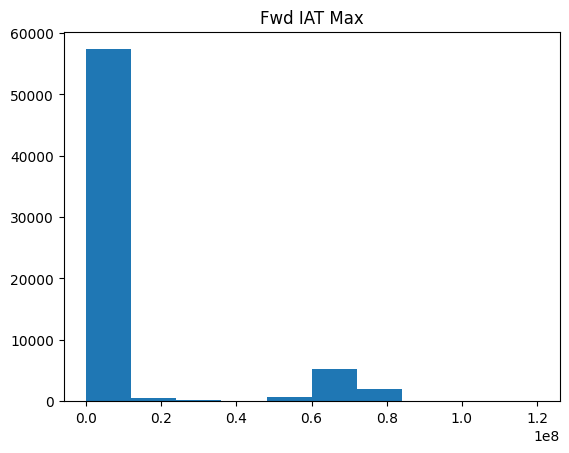

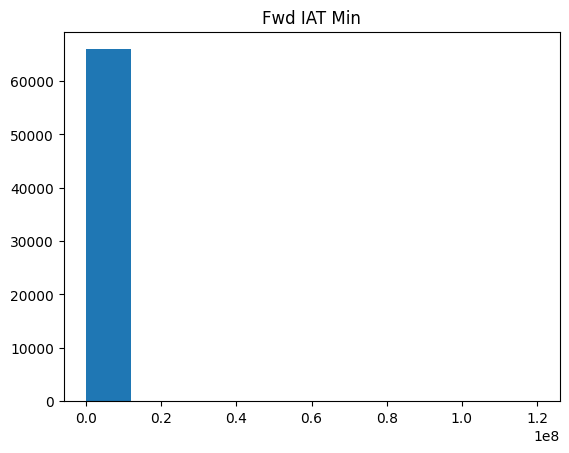

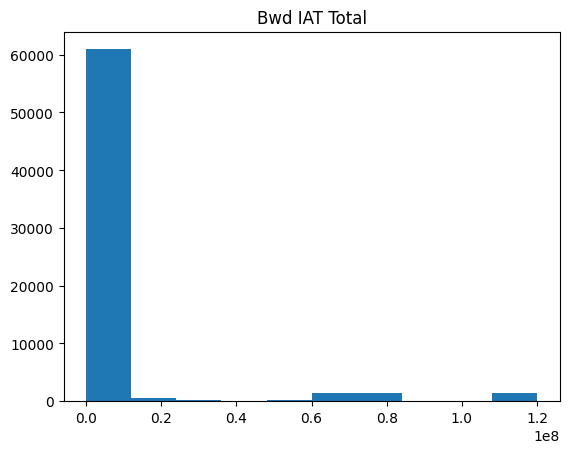

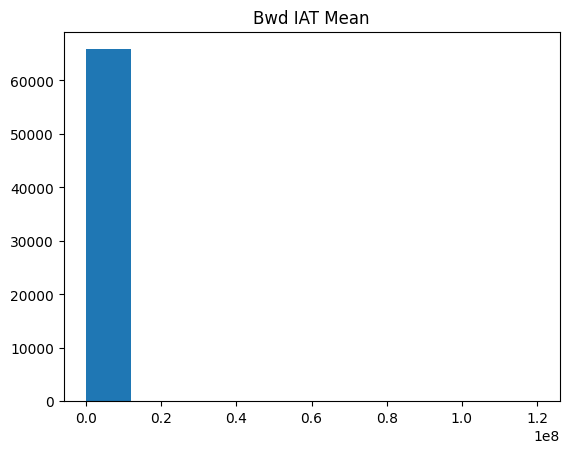

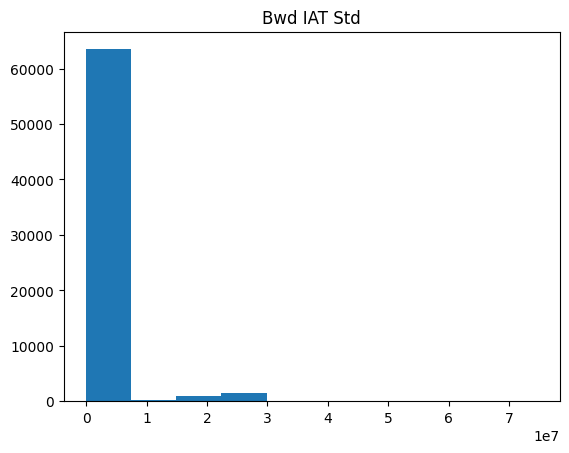

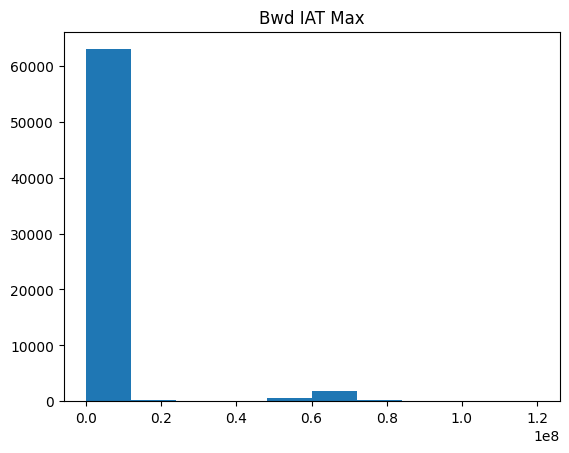

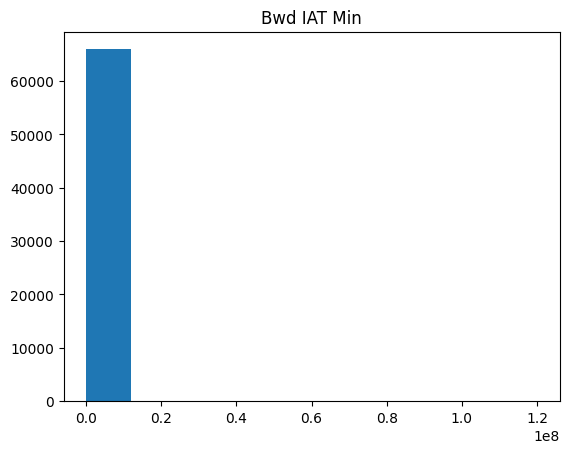

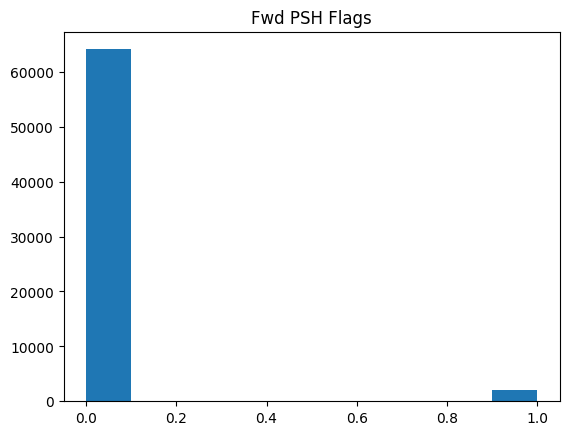

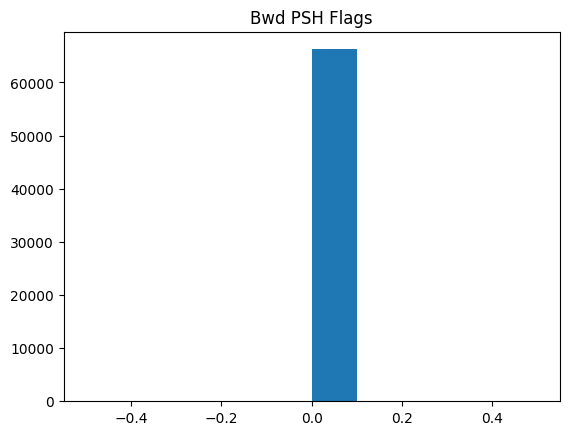

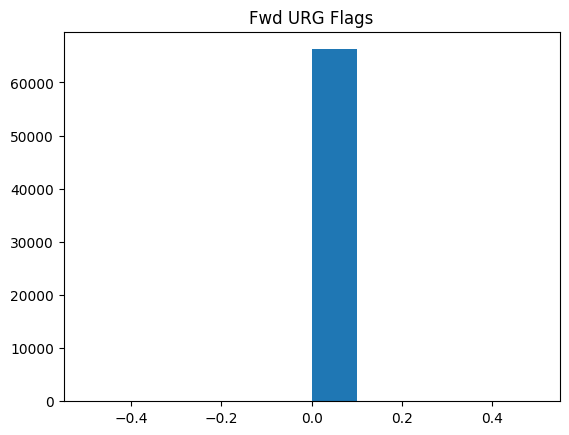

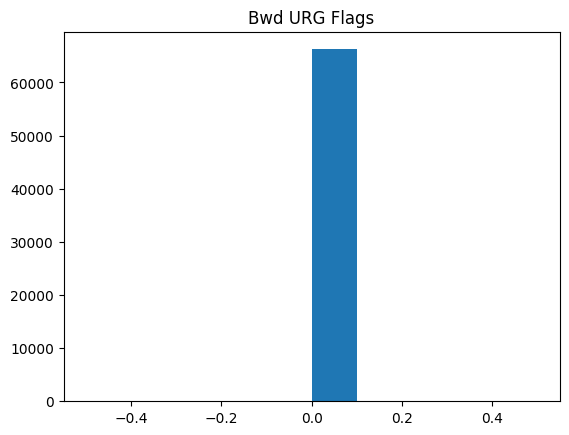

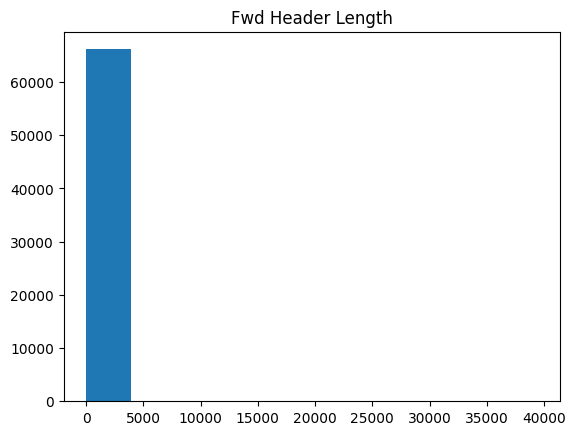

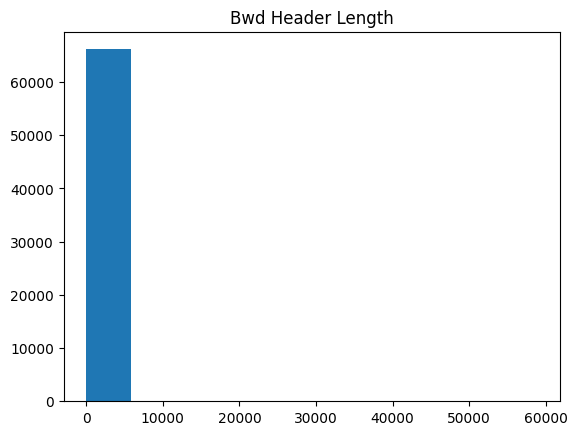

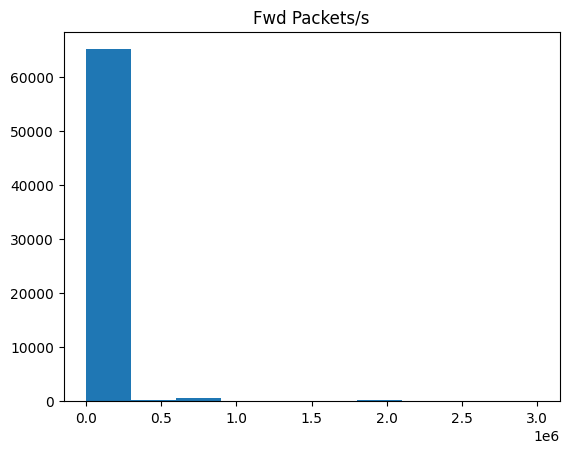

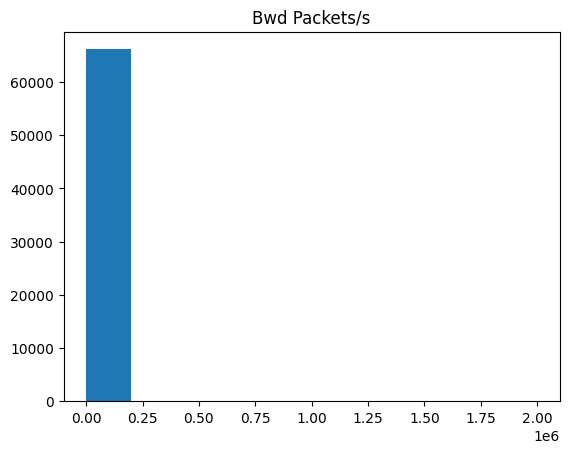

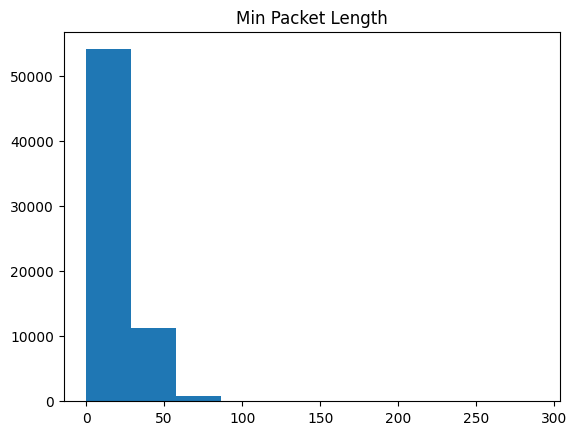

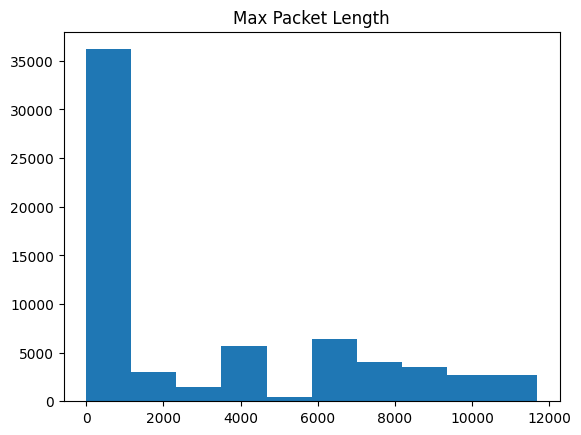

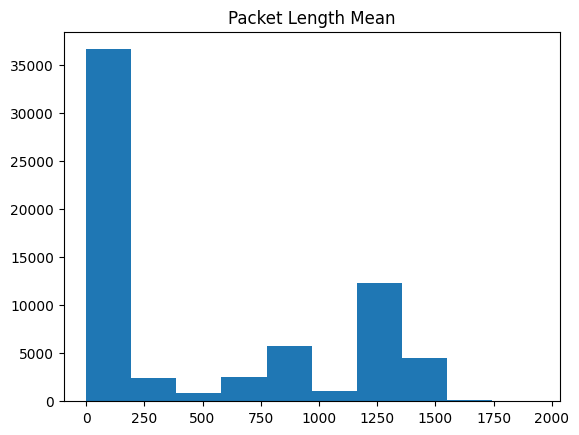

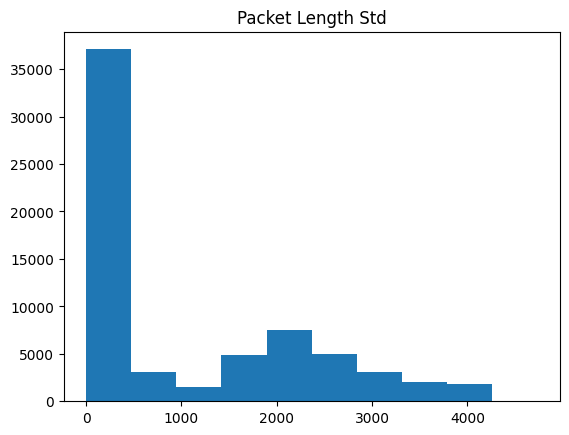

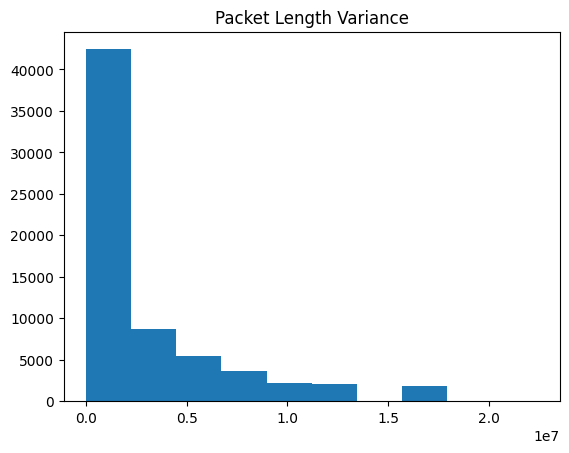

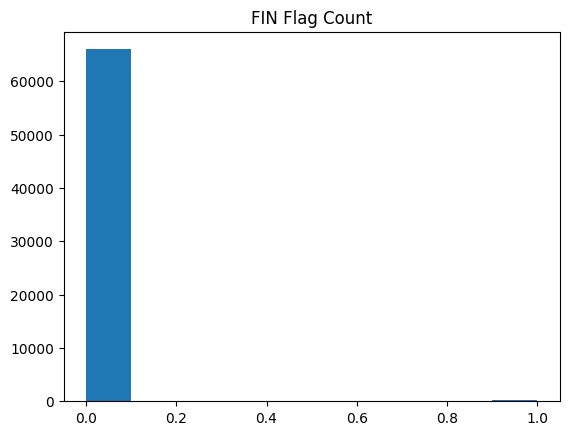

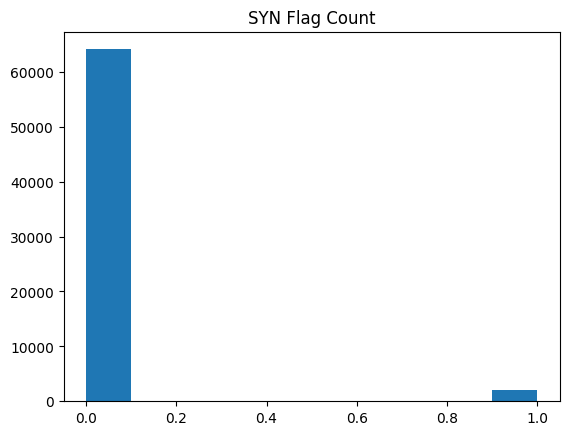

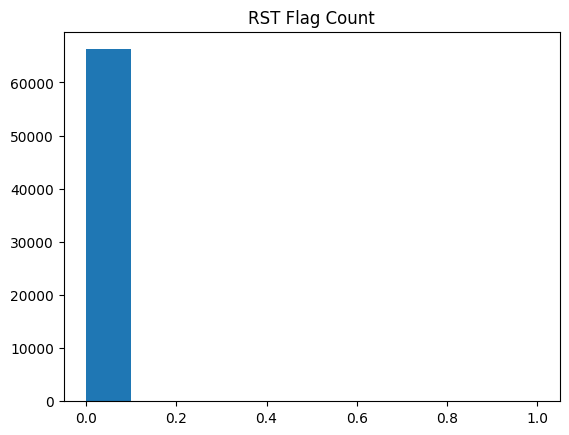

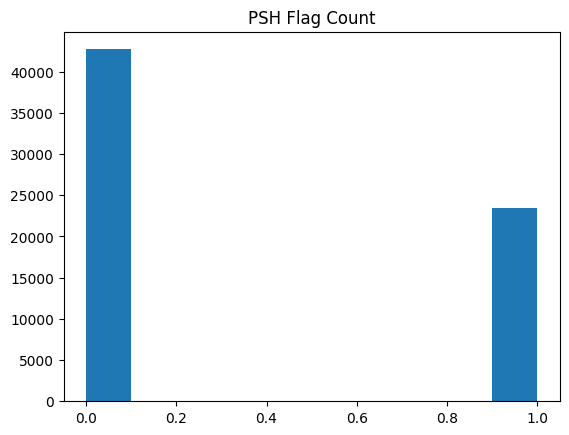

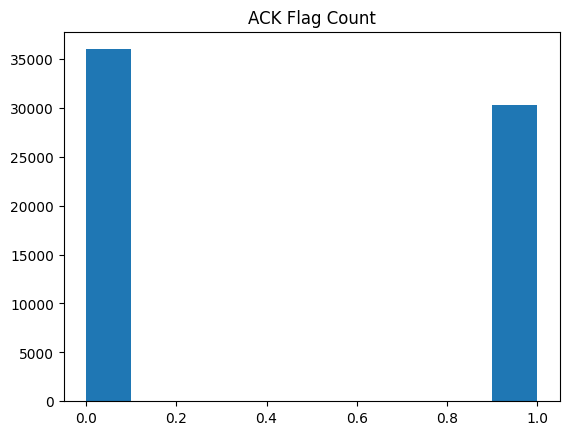

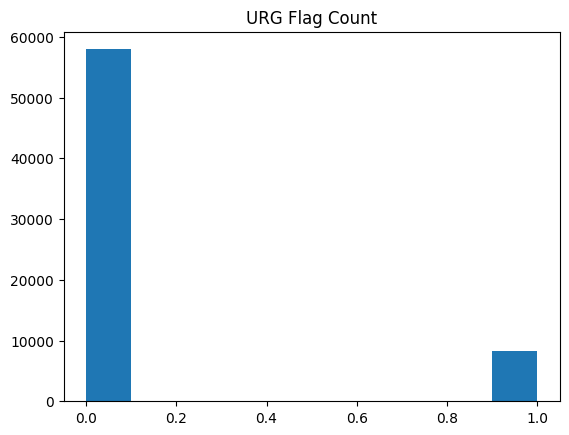

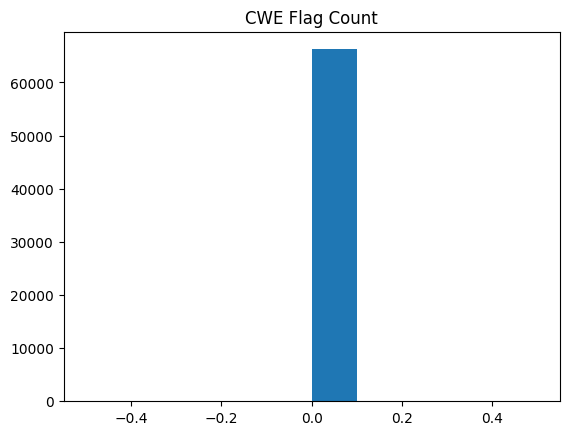

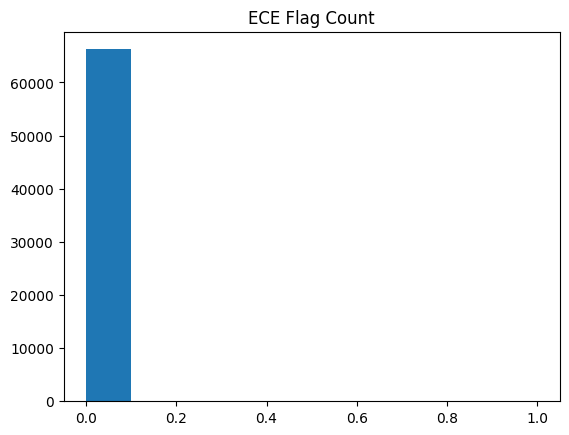

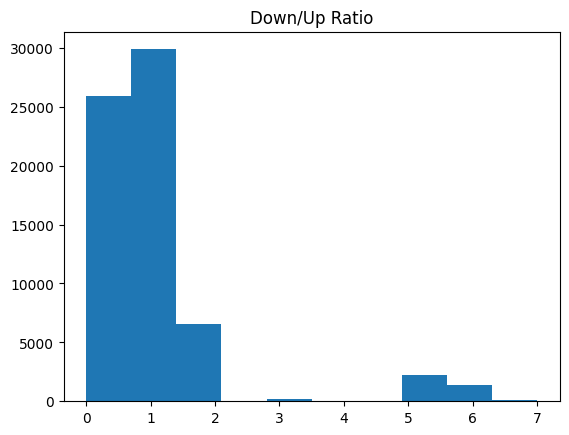

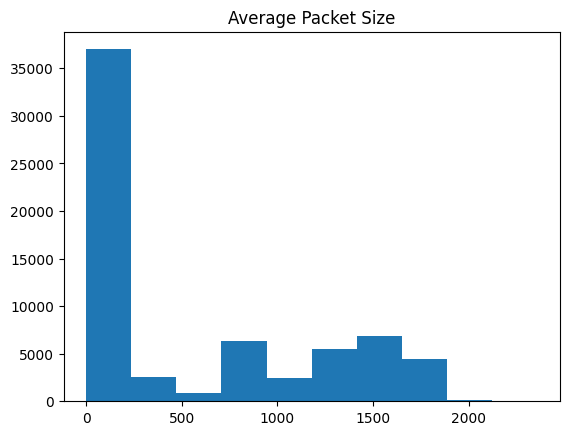

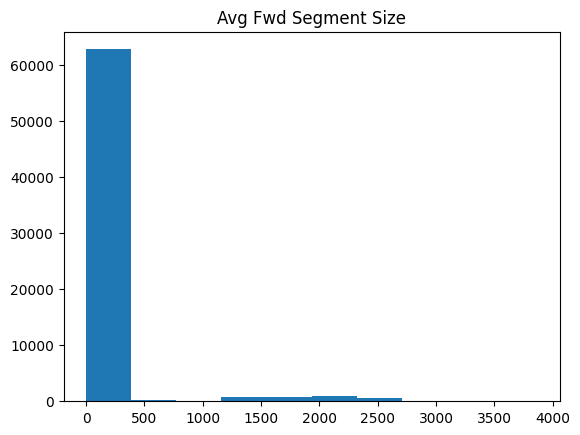

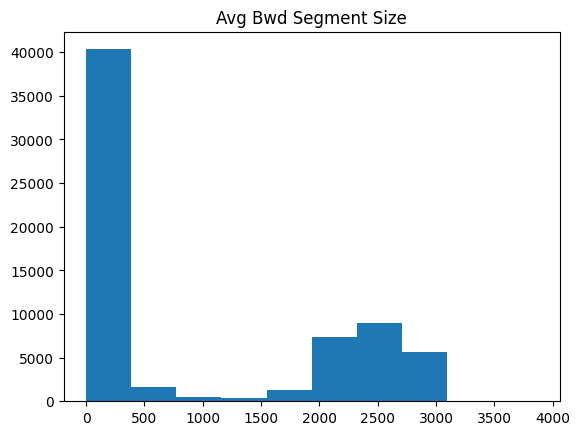

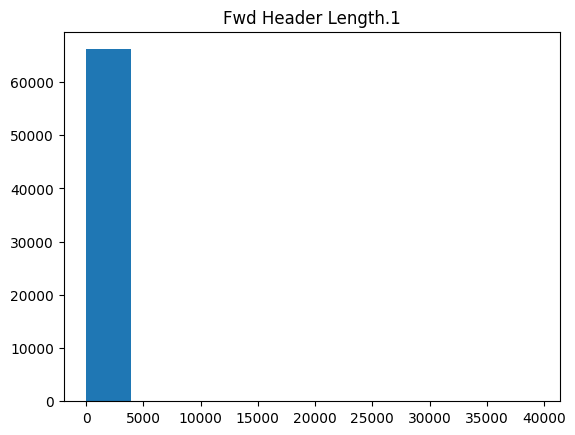

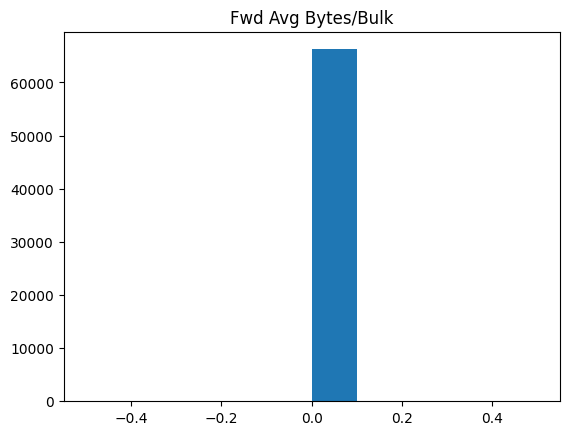

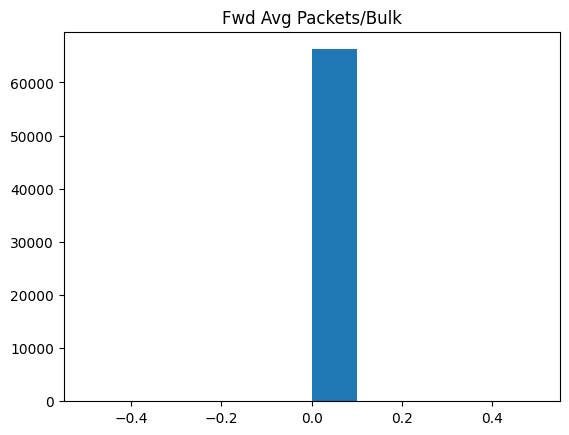

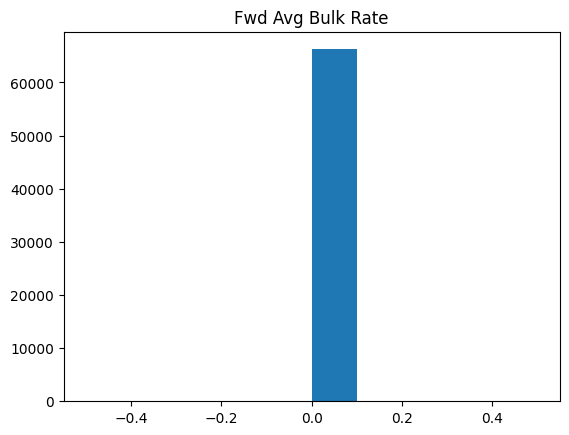

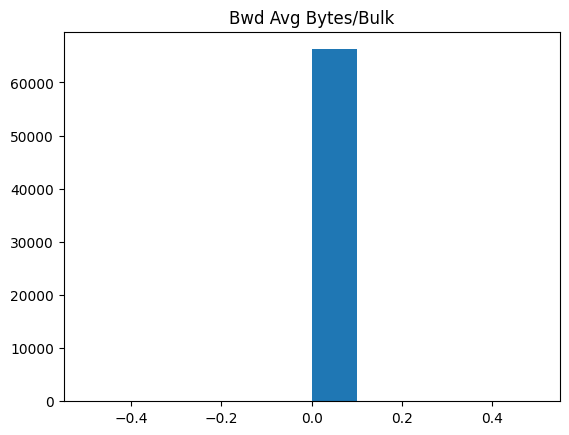

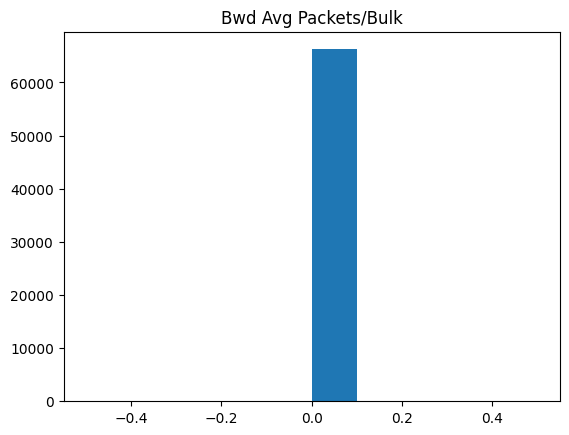

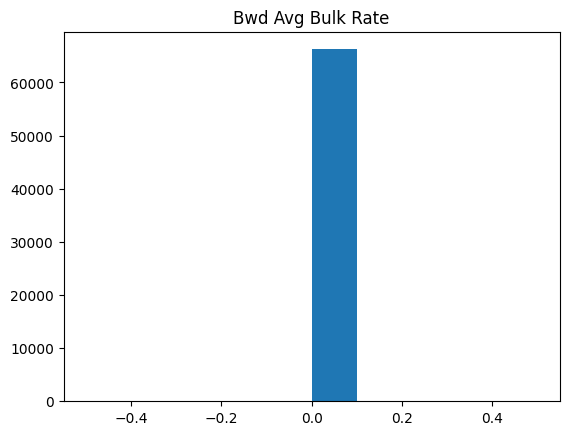

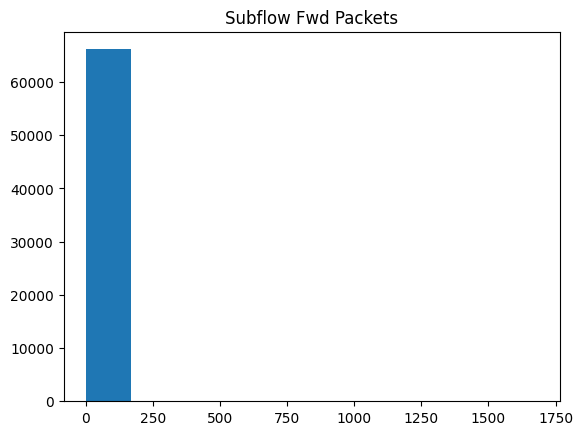

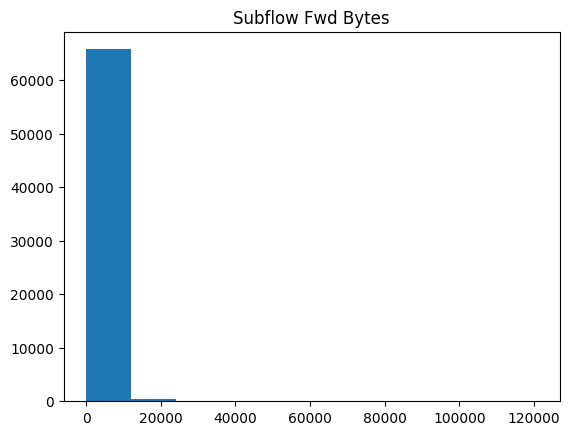

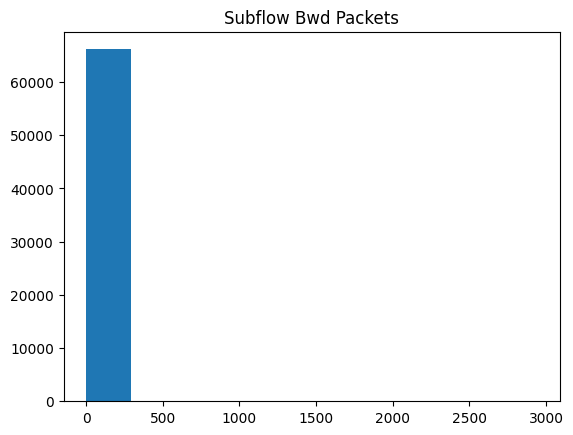

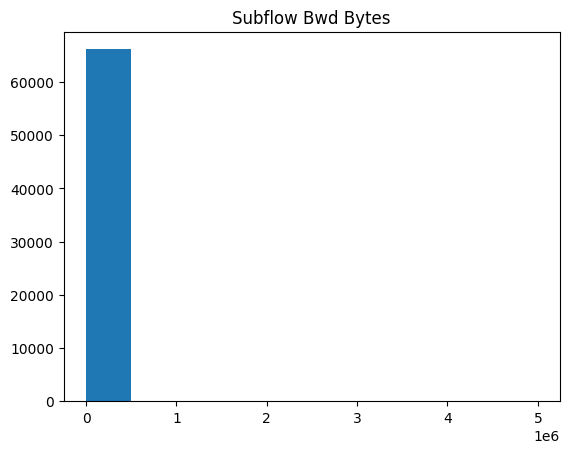

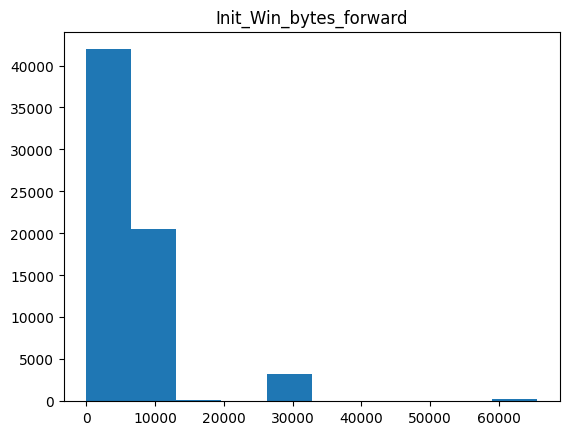

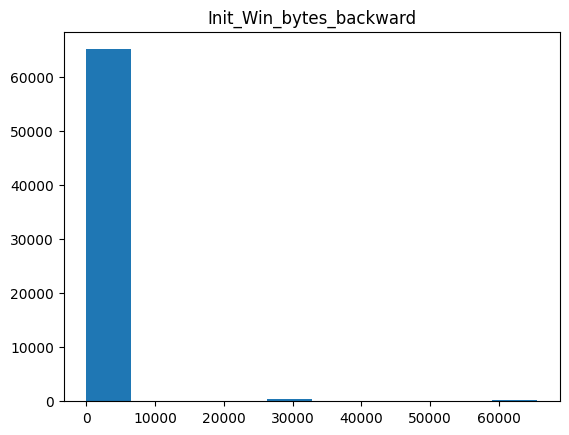

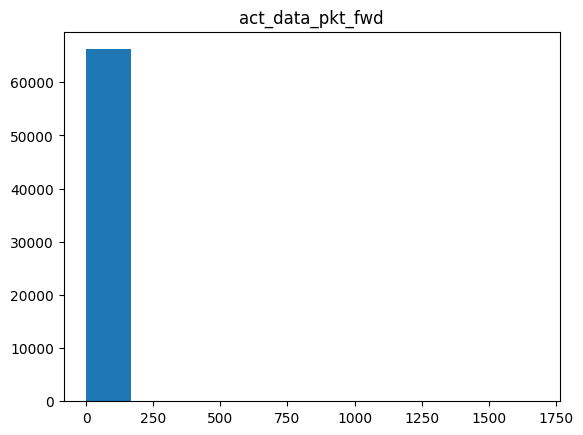

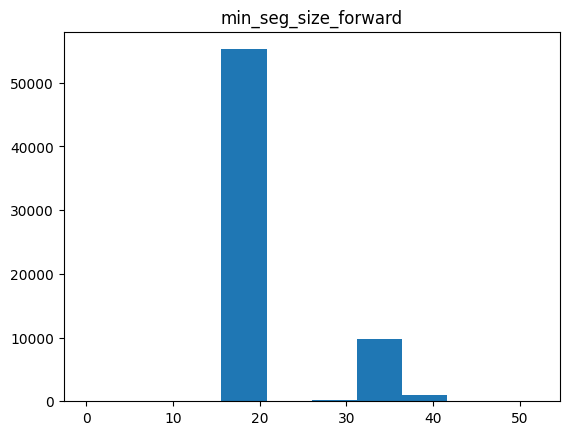

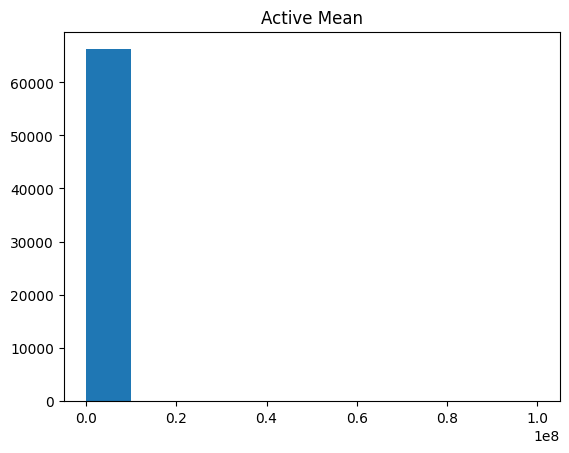

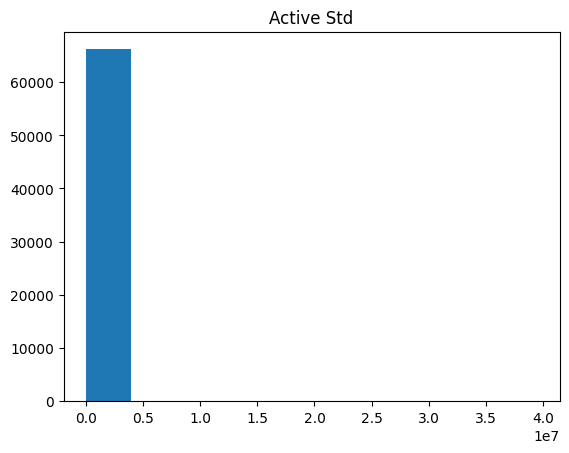

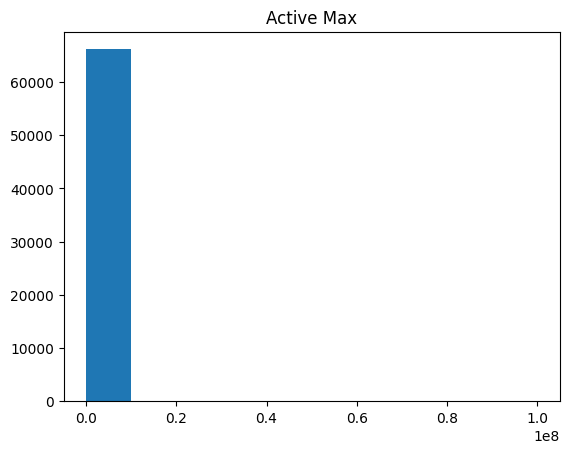

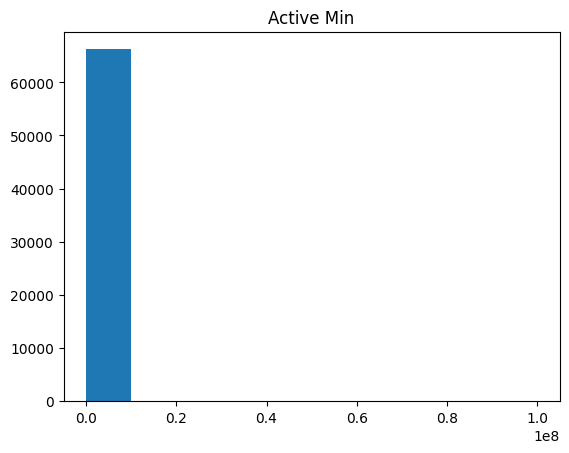

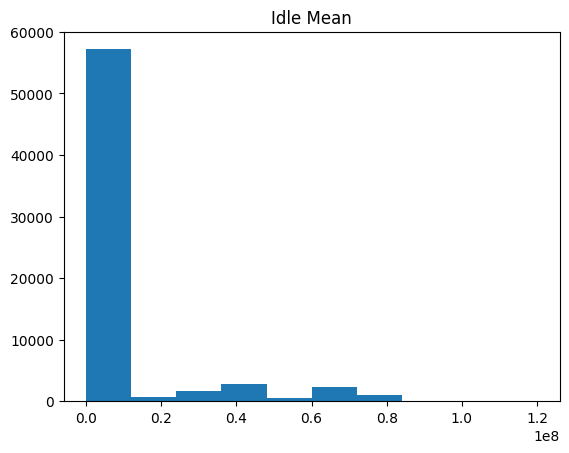

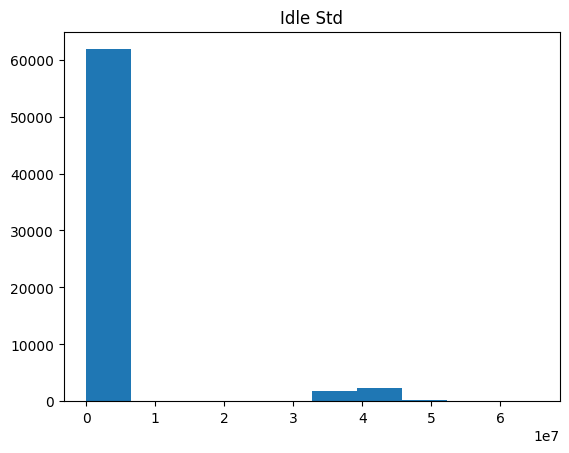

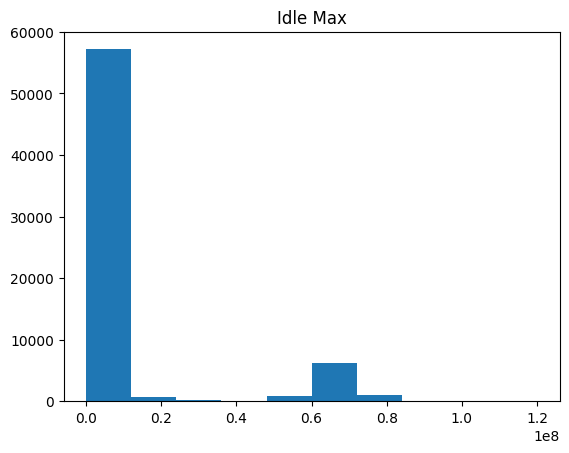

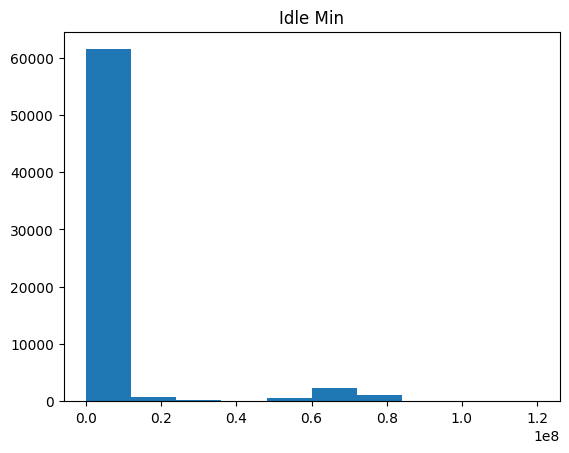

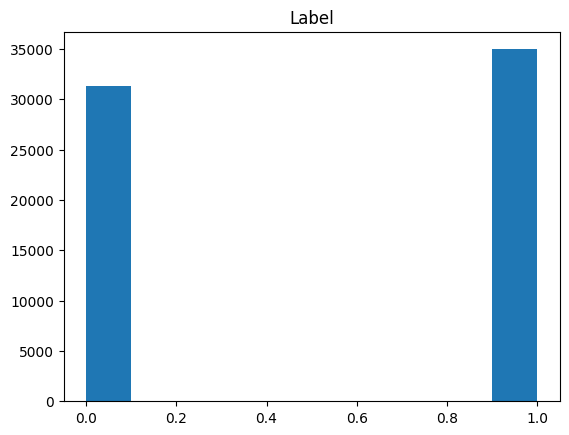

In [18]:
# Crear un histograma para cada caracteristica de los accesos
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

Separamos los datos en dos conjuntos: entrenamiento y prueba. Con el fin de entrenar nuestro modelo que detectara futuras intrusiones

In [ ]:
# Separar la informacion en caracteristicas y objetivos variables (Accesos Benignos y Maliciosos [DDoS])
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
# Segmentar la informacion en conjuntos de entrenamiento y prueba (70-entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
print("El tamano de la seccion de entrenamiento del dataset es = ",X_train.shape)
print("El tamano del conjunto de prueba del dataset es = ",X_test.shape)

El tamano de la seccion de entrenamiento del dataset es =  (46365, 78)
El tamano del conjunto de prueba del dataset es =  (19871, 78)


Entrenamiento del modelo empleando 3 tecnicas distintas para comprobar la efectividad de respuesta ante posibles ataques

Modelo de Random Forest

In [22]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

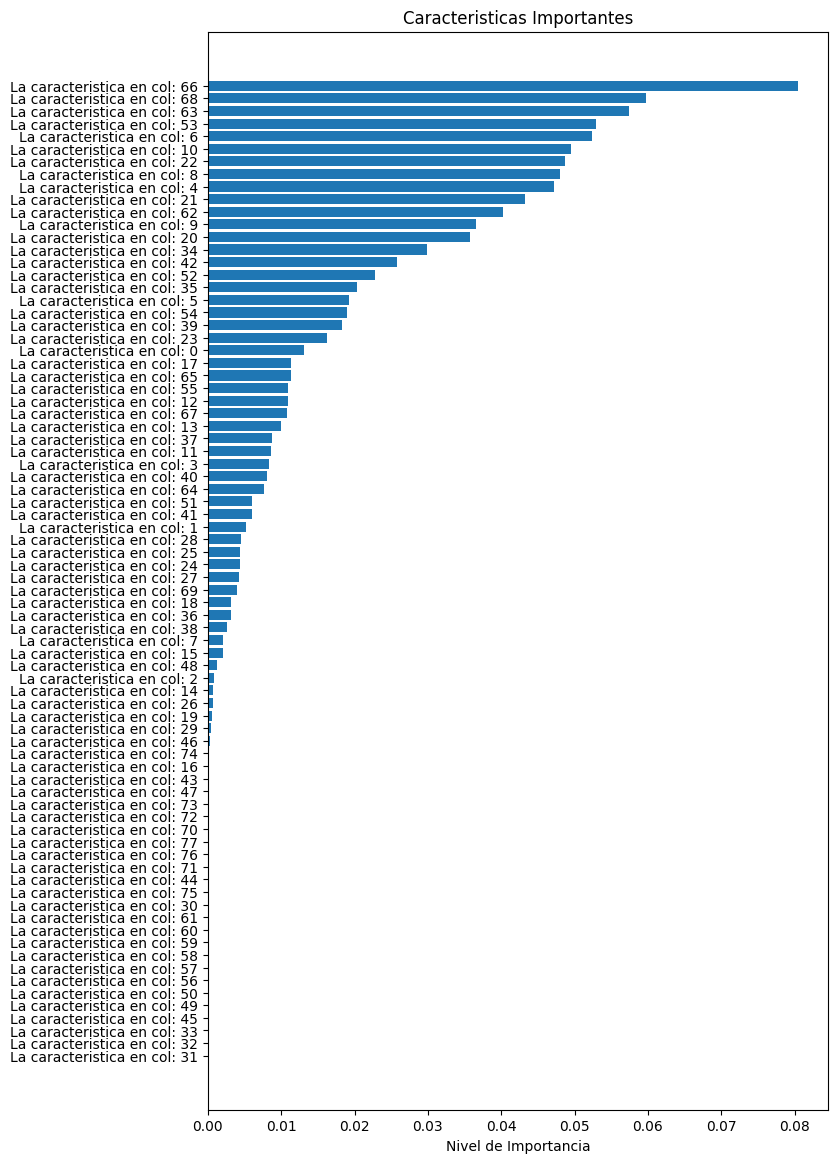

In [23]:
# Obteniendo las importancias de las características del modelo entrenado
importances = rf_model.feature_importances_

# Obteniendo los indices de las caracteristicas modificadas por importancia
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"La caracteristica en col: {i}" for i in indices]  # Indica que caracteristica se esta desplegando

# Plotting feature importances horizontally
# Grafica el nivel de importancia de la caracteristica de forma horizontal
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Nivel de Importancia")
plt.title("Caracteristicas Importantes")
plt.show()

Evalucion del modelo de "Random Forest"

In [ ]:
# Funcion para crear y mostrar la matriz de confusion
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predecidos')
    plt.ylabel('Verdaderos')
    plt.show()

'''
Accuracy: Qué tan bien predice el modelo en general.
Precision: Qué tan precisas son las predicciones positivas.
Recall: Qué tan bien detecta el modelo los casos positivos reales.
F1: Combina precisión y sensibilidad en una sola métrica.
'''

In [39]:
# Evaluar el funcionamiento del modelo Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nMetricas Random Forest:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Metricas Random Forest:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

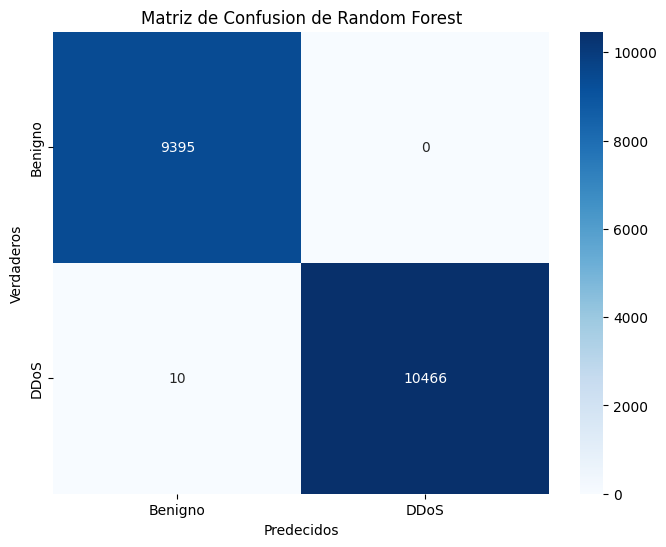

'\nRecordemos que interpretamos la matriz con las siguientes designaciones\n[Verdaderos-Positivos] [Falsos-Negativos]\n[Verdaderos-Negativos] [Falsos-Positivos]\n'

In [40]:
# Matriz de confusion para Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benigno', 'DDoS'], 'Matriz de Confusion de Random Forest')

'''
Recordemos que interpretamos la matriz con las siguientes designaciones
[Verdaderos-Positivos] [Falsos-Negativos]
[Verdaderos-Negativos] [Falsos-Positivos]
'''

Modelo de Regresion Logistica

In [44]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

e:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluacion del desempeño del modelo de Regresion Logistica

In [45]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [46]:
print('\nMetricas Regresion Logistica:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Metricas Regresion Logistica:
Accuracy: 0.9445
F1 Score: 0.9497
Precision: 0.9091
Recall: 0.9942


$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

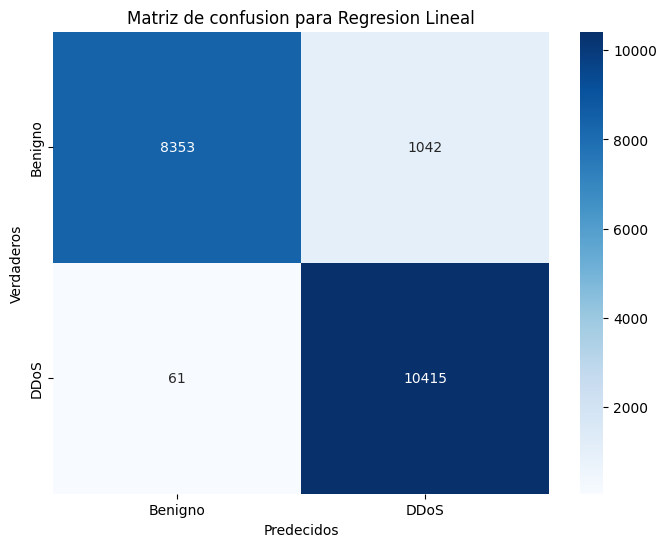

In [47]:
# Matriz de confusion para Regresion Logistica
plot_confusion_matrix(y_test, lr_pred, ['Benigno', 'DDoS'], 'Matriz de confusion para Regresion Lineal')

Modelo de Red Neuronal

In [48]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

e:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluacion de desempeno sobre la Red Neuronal

In [49]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nMetrica Red Neuronal:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Metrica Red Neuronal:
Accuracy: 0.9827
F1 Score: 0.9837
Precision: 0.9760
Recall: 0.9915


$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

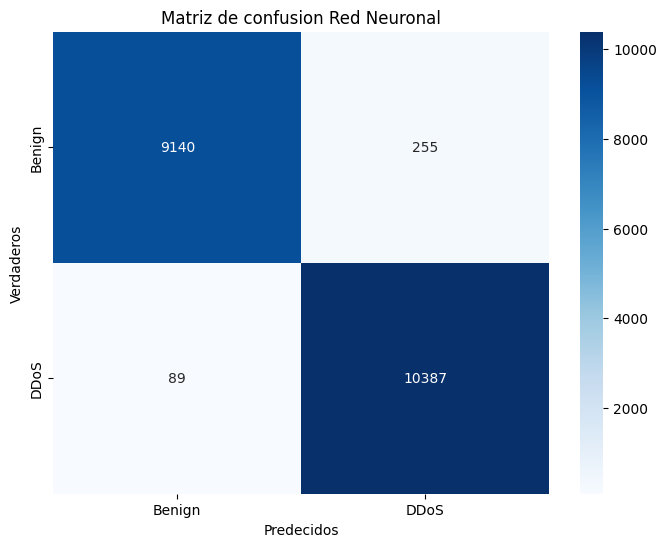

In [50]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Matriz de confusion Red Neuronal')

COMPARACION DE DESEMPENO ENTRE AMBOS MODELOS

In [52]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Regresion Logistica
lr_proba = lr_model.predict_proba(X_test)

# Red Neuronal
nn_proba = nn_model.predict_proba(X_test)

In [53]:
# Combina las predictiones para la curva ROC (Curva de Característica Operativa del Receptor)
# Nos permite muestrar la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación

# Calcular la curva ROC para Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calcular la curva ROC para Regresion Logistica
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calcular la curve ROC para Red Neuronal
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

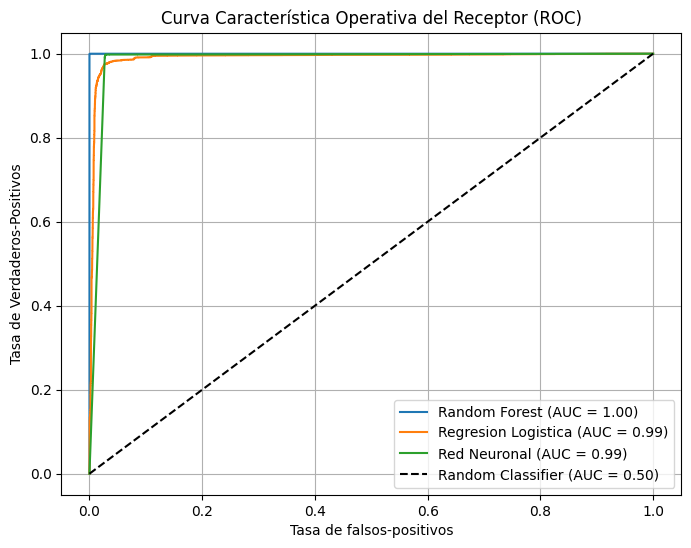

In [55]:
# Grafica las curvas ROC de todos los modelos aplicados
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Regresion Logistica (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Red Neuronal (AUC = {nn_auc:.2f})')

# Graficar la curva ROC para un clasificador aleatorio (50% de área)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('Tasa de falsos-positivos')
plt.ylabel('Tasa de Verdaderos-Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend()
plt.grid()
plt.show()